In [1]:
## Machine Learning Online Class - Exercise 1: Linear Regression

#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions 
#  in this exericse:
#
#     warmUpExercise
#     plotData
#     PART#01
#         gradientDescent
#         computeCost
#         Visualization
#         LearningRate
#     PART#02
#         OPTIMIZATION FUNCTIONS
#         LEARNING RATE
#
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
# X refers to the population size in 10,000s
# Y refers to the profit in $10,000s
	

#Write the code below every comment
import numpy as np
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/My Drive/ex1data1.txt"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
##==================== Part 1: Basic Function ====================
#Complete warmUpExercise 

# 5x5 matrix with 1's on main diagonal  

import numpy as np
def iden(a):                   # function definition
  b = np.identity(a)
  return b

print("Matrix a : \n", iden(5))   # function call


Matrix a : 
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


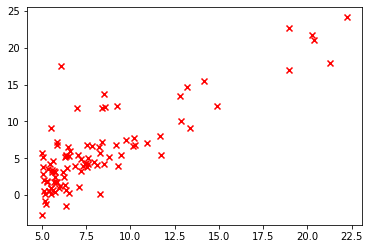

In [14]:
## ======================= Part 2: Plotting =======================

import matplotlib.pyplot as plt

# used for manipulating directory paths
import os


# Read comma separated data
data = np.loadtxt(os.path.join('Data', path ), delimiter=',')
X, Y = data[:, 0], data[:, 1]

 
# Plot Data
# Note: You have to complete the code in plotData function

def plotdata(a,b):                       # function def
 # plotting points as a scatter plot 
 # ==========YOUR CODE HERE============
  plt.scatter(a,b,marker='x',c='r')
 # ===================================
  return 
 
plotdata(X,Y)  # function Call
plt.show()


In [15]:

m = Y.size  # number of training examples
X = np.stack([np.ones(m), X], axis=1) # it used to convert X in to (97x2), first colum is all ones to get  where theta is (2x1)    "theta[0]+theta[1]*X"
print(X.shape)


(97, 2)


In [16]:

import numpy as np
from numpy import *

def computeCost(X,y , theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # ==========YOUR COST FUNCTION J HERE============
  J = (1/(2*m)) * sum(np.square(h-y))
 # ===================================
  return J

J = computeCost(X, Y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed =', J)
print('Expected cost value (approximately) 32.07\n')


With theta = [0, 0] 
Cost computed = 32.072733877455676
Expected cost value (approximately) 32.07



[-3.89570258  1.19302578]
4.47697137653333


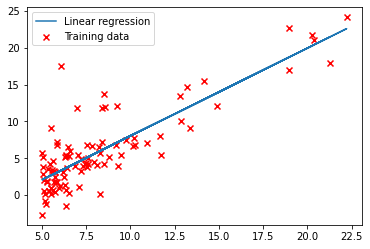

In [18]:

def gradientDescent(X, y, theta, alpha, num_iters):
  m = y.shape[0]
  theta = theta.copy()
  J_history = []
 
  for i in range(num_iters):
    # ==========YOUR GRADIENT DESCENT "theta" HERE============
    h = np.dot(X, theta)  
    grad_0 = (1/m) * sum(h - y)
    grad_1 = (1/m) * sum(X[:,1] * (h - y))
    theta[0] = theta[0] - alpha * (grad_0)
    theta[1] = theta[1] - alpha * (grad_1)
    # ===================================
    J_history.append(computeCost(X, y, theta))
  return np.array(theta), J_history

#=============== initialize fitting parameters
theta = np.zeros(2)
#print(theta.shape)
# =================some gradient descent settings
iterations = 3000
alpha = 0.02

theta, J_history = gradientDescent(X ,Y, theta, alpha, iterations) 
print(theta)
print(min(J_history))


# plot the linear fit
plotdata(X[:, 1],Y)
plt.plot(X[:, 1], np.dot(X, theta))

plt.legend([ 'Linear regression','Training data',]);



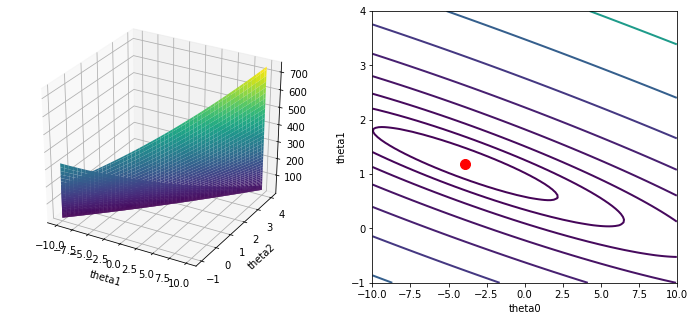

In [19]:
# ==================================NO NEED CHANGE CODE IN THIS CELL
# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# grid over which we will calculate J COST
t0 = np.linspace(-10, 10, 100)
t1 = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((t0.shape[0], t1.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(t0):
    for j, theta1 in enumerate(t1):
        J_vals[i, j] = computeCost(X,Y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(t0, t1, J_vals, cmap='viridis')
ax.set_xlabel('theta1')
ax.set_ylabel('theta2')


# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax2 = plt.subplot(122)
ax2.contour(t0, t1, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
ax2.set_xlabel('theta0')
ax2.set_ylabel('theta1')
ax2.plot(theta[0], theta[1], 'ro', ms=10, lw=2)

pass



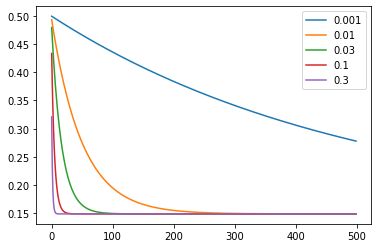

In [20]:

# Read comma separated data
data = np.loadtxt(os.path.join('Data', path ), delimiter=',')
X, Y = data[:, 0], data[:, 1]


def featureNormalize(X): 
    #===================YOUR CODE HERE=========
    mu = np.mean(X)
    sigma = np.std(X)
    X_norm = (X - mu) / sigma
    #==========================================
    return X_norm, mu, sigma

X, mu, sigma = featureNormalize(X)
Y, mu, sigma = featureNormalize(Y)

X = np.stack([np.ones(m), X], axis=1)

# CHANGE THE VALUES of ALPHAS, 5 VALUES OF ALPHA 
#PLOT LEARNING RATES FOR FOLLOWING FOR ALPHAS, NO NEED TO CHANGE THE CODE ONLY REQUIRE "gradientDescent" TO BE DEFINED CORRECTLY


# some gradient descent settings
iterations = 500
alpha = [0.001,0.01,0.03,0.1,0.3] #--------------ENTER YOUR LEARNING RATES
costs=[]

for i in range(5):
  theta = np.zeros(2) 
  theta, J_history = gradientDescent(X ,Y, theta, alpha[i], iterations)
          # initialize fitting parameters
  costs.append(J_history)
# Plot the convergence graph

for i in range(5):
  plt.plot(np.arange(len(costs[i])), costs[i], label=str(alpha[i]))
#plt.xlabel('Number of iterations')
#plt.ylabel('Cost J')

plt.legend(['0.001','0.01','0.03','0.1','0.3',]);